# Análise de Dados de um Ecommerce com Regressão Linear
O trabalho visa analisar se os esforços de venda da empresa devem ser concentrados
nos aplicativos móveis ou na web

### Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Carregando e Verificando os dados

In [2]:
# Carregando o CSV
ecom = pd.read_csv("Ecommerce Customers")

# Avg. Session Length: Tempo médio das sessões de consultoria de estilo na loja.
# Time on App: tempo médio gasto no app em minutos.
# Time on Website: tempo médio gasto no site em minutos.
# Lenght of Membership: Há quantos anos o cliente é membro.

In [4]:
# Verificando as primeiras linhas
ecom.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
# Verificando uma estatística sobre o conjunto de dados
ecom.describe().round()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.0,500.0,500.0,500.0,500.0
mean,33.0,12.0,37.0,4.0,499.0
std,1.0,1.0,1.0,1.0,79.0
min,30.0,9.0,34.0,0.0,257.0
25%,32.0,11.0,36.0,3.0,445.0
50%,33.0,12.0,37.0,4.0,499.0
75%,34.0,13.0,38.0,4.0,549.0
max,36.0,15.0,40.0,7.0,766.0


In [6]:
# Informações mais detalhadas sobre os dados
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


## Análise exploratória dos dados

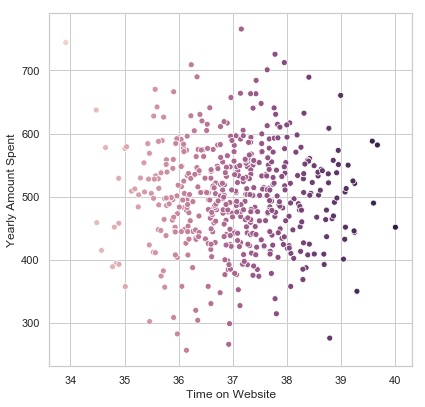

In [84]:
# Visualizando a relação entre o tempo no website  e a quantia anual de gasto
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x = ecom['Time on Website'], y = ecom['Yearly Amount Spent'], hue=ecom['Time on Website'], data = ecom, legend = False)

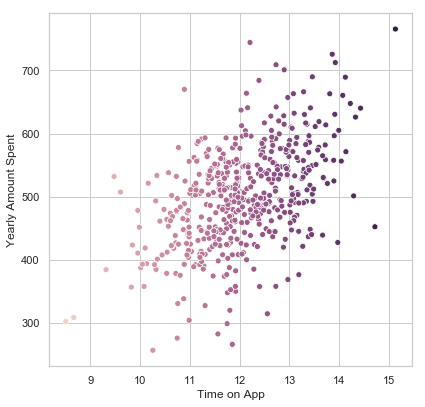

In [14]:
# Visualizando a relação entre o tempo no celular e a quantia anual de gasto
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x = ecom['Time on App'], y = ecom['Yearly Amount Spent'], hue=ecom['Time on App'], data = ecom, legend = False)

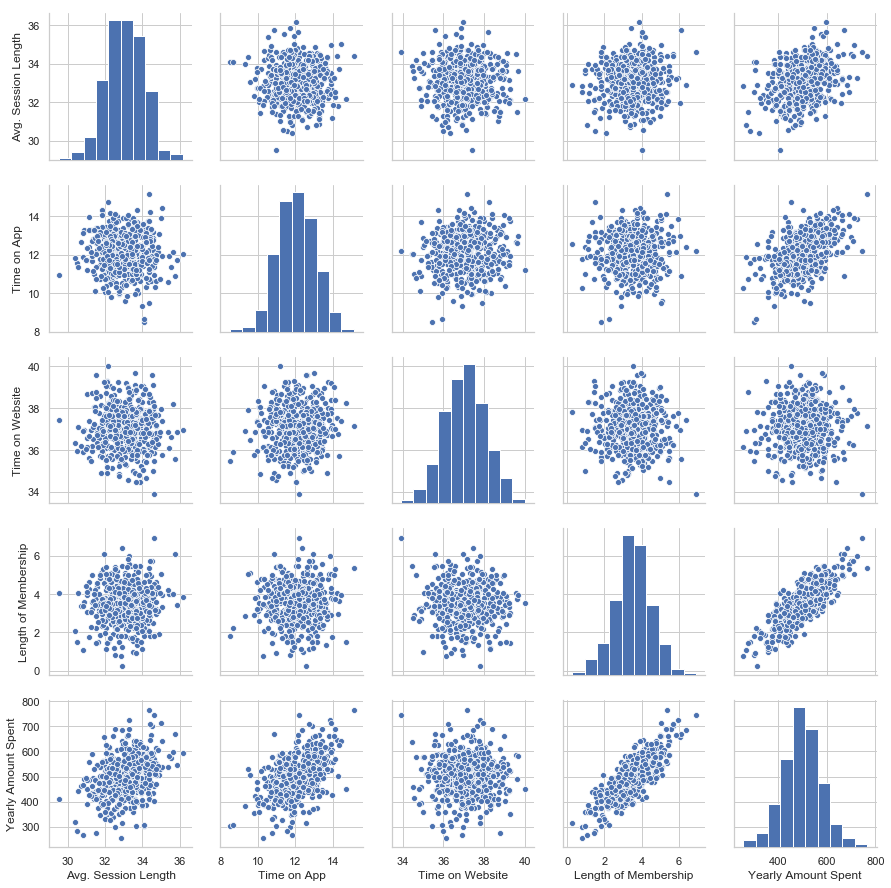

In [87]:
# Visualizando as relações entre todos dados do dataset
sns.pairplot(ecom)

<b> Pelo resultado do gráfico acima, podemos verificar que o tempo como membro influencia a quantia anual de gasto. 


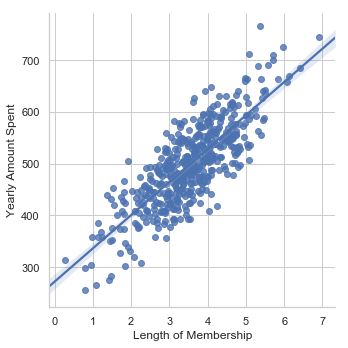

In [88]:
sns.lmplot( x = 'Length of Membership', y = 'Yearly Amount Spent', data = ecom)

## Treinando e testando os dados

In [24]:
ecom.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

#### Dividindo as colunas nas variáveis e a que queremos predizer

In [32]:
X = ecom[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

In [35]:
y = ecom[['Yearly Amount Spent']]

In [36]:
from sklearn.model_selection import train_test_split

In [38]:
# Divide o conjunto de dados em treino e teste para X e y (30 %)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [41]:
X_train.shape

(350, 4)

In [42]:
X_test.shape

(150, 4)

In [43]:
y_train.shape

(350, 1)

In [45]:
y_test.shape

(150, 1)

####  Treinando o modelo

In [40]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [50]:
# Ajuste do modelo com os dados de treino
lm.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Previsão dos dados de teste

In [51]:
# Prevendo o conjunto X dos dados
predict = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

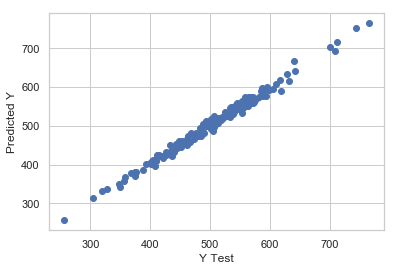

In [53]:
# Scatter plot valores reais de teste em relação aos valores preditos.
plt.scatter(y_test,predict)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Avaliando o Modelo

In [56]:
from sklearn import metrics

# Erro Médio Absoluto
print('MAE:', metrics.mean_absolute_error(y_test, predict))

# Erro Médio Quadrado
print('MSE:', metrics.mean_squared_error(y_test, predict))

# Erro Médio Quadrado da Raíz
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MAE: 7.228148653430835
MSE: 79.81305165097467
RMSE: 8.933815066978646


## Resíduos e Coeficientes

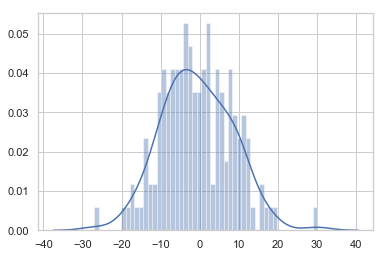

In [59]:
# Resíduos (se houver uma boa distribuição o modelo é eficiente)
sns.distplot(((y_test)-predict),bins=50);

In [73]:
# Coeficientes
coeffecients = pd.DataFrame(lm.coef_[0],X.columns)
coeffecients.columns = ['Coeffecients']
coeffecients

,Coeffecients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


<b>Interpretando os coeficientes:

Mantendo todos as outras variáveis constantes, um aumento de 1 unidade na média de tempo (Avg. Session Length) de uso está associado a um aumento de 25,98 dólares totais gastos.

Mantendo todos as outras variáveis constantes, um aumento de 1 unidade no tempo gasto no App (Time on App) está associado a um aumento de 38,59 dólares totais gastos.

Mantendo todos as outras variáveis constantes, um aumento de 1 unidade no tempo no site (Time on Website) está associado a um aumento de 0,19 dólares em dólares.

Mantendo todos as outras variáveis constantes, um aumento de 1 unidade no tempo de associação (Length of Membership) está associado a um aumento de 61,27 dólares em dólares.